#Story


---

เด็กหนุ่มมัธยมปลายที่ชื่นชอบในเรี่องการมูเป็นอย่างมาก กังวลเกี่ยวกับการสอบไฟนอลของตัวเองที่อาจจะได้น้อยกว่าที่หวัง จึงต้องการทำโปรเจคเพื่อหาสิ่งต่าง ๆ ที่ทำให้คะแนนสอบสูงขึ้นนอกเหนือจากการอ่านหนังสือ เค้าจึงได้เก็บข้อมูลของนักเรียนชั้นม.6 จำนวน 500 คน เพื่อหาความสัมพันธ์ของคะแนนสอบกับสิ่งต่าง ๆ ทั้งทางวิทยาศาสตร์และโหราศาสตร์ เช่น ขาข้างที่ก้าวเข้าห้องสอบ, เวลานอน, สีของปากกา ฯ แล้วจึงนำมาดูว่าสิ่งต่าง ๆ เหล่านั้นเกี่ยวข้องกับคะแนนสอบอย่างไร เพื่อไปทำหรือมูตาม


**แต่ว่า สายมูจะช่วยให้คะแนนสอบเพิ่มขึ้นได้
จริงหรือไม่?**

ฟิลด์ข้อมูล (Fields) ที่เก็บข้อมูลของนักเรียน ได้แก่

Fields | meaning
--- | ---
 `Sleep_Hours`| เวลานอนก่อนเข้าสอบ
 `Stepping_foot`| ขาข้างที่เข้าห้องสอบ
 `Worship_location` |สถานที่ขอพรก่อนสอบ
 `Is_single`| มีแฟนหรือไม่
 `GPAX`| เกรดเฉลี่ยสะสม
 `Attendance_percentage` | เปอร์เซ็นต์การเข้าเรียน
 `Practice_hours` |เวลาเฉลี่ยในการซ้อมทำโจทย์
 `Pen_color` |สีของปากกาที่ใช้ในห้องสอบ
 `Food_choice` | อาหารที่รับประทานก่อนสอบ
 `Exam_Score` | คะแนนสอบ


# Table of content

>[Story](#scrollTo=5e_ig_HQwXyP&uniqifier=2)

>[Table of content](#scrollTo=0FxIuUrGaFZf&uniqifier=2)

>[1  Data processing](#scrollTo=qiFeY89U5Y-w&uniqifier=2)

>>[1.1 Preprocessing](#scrollTo=qD6UcMisHU9v&uniqifier=2)

>>[1.2 Data Augmentation](#scrollTo=O6oiq3A_uYu2&uniqifier=2)

>[2 Data visualization](#scrollTo=ZKCL2eieHz4s&uniqifier=2)

>>[Exercise 01](#scrollTo=PTwwwBSb1EIr&uniqifier=2)

>[3 Prediction](#scrollTo=ThKhv_NtzbPZ&uniqifier=2)

>>[3.1 Linear Regression](#scrollTo=1oHVgDud0Dbf&uniqifier=2)

>>[3.2 libary for traning data set](#scrollTo=5_T6Yexv1g0h&uniqifier=2)

>>[3.3 Model Testing and Evaluation](#scrollTo=O-jxQEsL1ucT&uniqifier=2)

>>[Exercise 2](#scrollTo=1ps9snbw9ADg&uniqifier=2)

>>[3.3 Predict](#scrollTo=r34n_9ShCLSa&uniqifier=2)

>[4 Conclusion](#scrollTo=pRW47balC2ok&uniqifier=2)

>[Extra](#scrollTo=lbCofe81CbnD&uniqifier=2)



#1  Data processing

---

การประมวลผลข้อมูล (Data Processing) เป็นการเตรียมข้อมูลที่เก็บข้อมูลมาแปลให้เป็นข้อมูลที่สามารถใช้งานได้ ซึ่งเป็นส่วนสำคัญอย่างมากที่ทำให้ผลลัพธ์ของการคาดการณ์คะแนนสอบนั้นแม่นยำยิ่งขึ้น


In [55]:
#ทำการ ใช้คำสั่ง import libary ที่จะนำมาใช้ในการจัดการกับข้อมูลและ
import pandas as pd #สำหรับการจัดการกับข้อมูล
import matplotlib.pyplot as plt #ทำกราฟเส้นตรง
import seaborn as sns #ทำmatrix correlation


In [56]:
#โหลดข้อมูลที่รวบรวบมา
file_url = 'https://drive.google.com/uc?id=1rhbgBBLwIoZZztKIBwwTYtkNNu0idRY6'
df = pd.read_csv(file_url)


## 1.1 Preprocessing


---
ก่อนที่เราจะสามารถวิเคราะห์ข้อมูลได้จะต้องมีการตรวจสอบข้อมูลที่มีก่อน โดยสิ่งที่สังเกตุมีดังนี้
*   ประเภทของข้อมูล
*   ความสมบูรณ์ของข้อมูล
*   ข้อมูลทางสถิติ






In [57]:
#ดูของสรุปต่างของข้อมูลชุดนี้
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sleep_Hours            500 non-null    float64
 1   Stepping_foot          500 non-null    object 
 2   Worship_location       500 non-null    object 
 3   Is_single              500 non-null    object 
 4   GPAX                   500 non-null    float64
 5   Attendance_percentage  500 non-null    float64
 6   Practice_hours         500 non-null    float64
 7   Pen_color              500 non-null    object 
 8   Food_choice            500 non-null    object 
 9   Exam_Score             500 non-null    float64
dtypes: float64(5), object(5)
memory usage: 39.2+ KB


จากข้อมูลที่มีอยู่จะเห็นได้ว่ามีข้อมูลที่ประเภท object อยู่หลายฟิลด์ ซึ่งจะไม่สามารถในไปคำนวณทางสถิติจะมี


*   Stepping_foot
*   Worship_location
*   Is_single
*   Pen_color
*   Food_choice

*สามารถลองนำโด้ดด้างล่างไป run ดูได้

```
# df['Stepping_foot'].describe() #สำหรับข้อมูลที่ไม่ใช่ตัวเลข
```


```
# df['Sleep_Hours'].describe() #สำหรับข้อมูลตัวเลข
```










In [58]:
#หาค่าทางสถิติของข้อมูลที่เป็นตัวเลข
df.describe()

,Sleep_Hours,GPAX,Attendance_percentage,Practice_hours,Exam_Score
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,7.536000,3.271080,48.18396,2.482040,48.216880
std,1.503737,0.403671,28.67141,1.986675,20.502717
min,4.000000,1.990000,0.02000,0.010000,0.000000
25%,7.000000,2.990000,23.30250,1.100000,33.377500
50%,8.000000,3.320000,46.66000,1.875000,47.630000
75%,9.000000,3.600000,73.06500,3.365000,62.315000
max,11.000000,3.970000,99.58000,10.000000,100.000000


In [59]:
#แสดงผลจำนวนข้อมูลในฟิลด์ต่างๆ ที่ไม่ใช่ตัวเลขทั้งหมด
for col in df.columns:
  if df[col].dtype == 'object':
    display(df[col].value_counts())


,count
Stepping_foot,
Left,303
Right,197


,count
Worship_location,
Two Kings Monuments,210
Erawan Shrine,81
No specific location,71
Ganesha temple,70
Bangkok City Pillar Shrine,68


,count
Is_single,
No,256
Yes,244


,count
Pen_color,
Yellow,193
Red,84
Black,81
Green,74
Blue,68


,count
Food_choice,
Pork,163
Truffle,92
Banana,83
Grass Jelly,82
Egg,80


Box Plot สำหรับแสดงการกระจายของข้อมูลในฟิลด์ต่างๆ

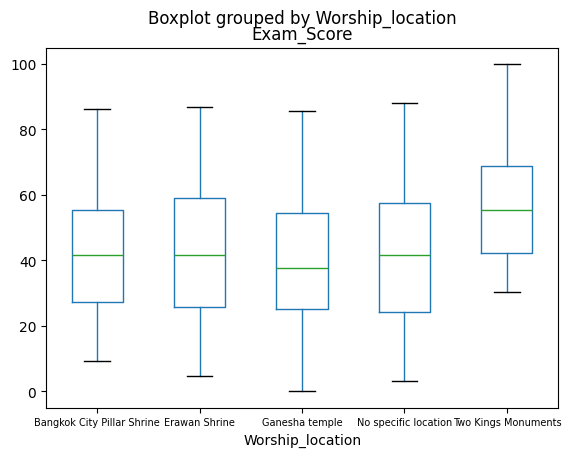

In [60]:
# กราฟ Box plot สำหรับ worship_location กับ Exam_score
df.boxplot(column='Exam_Score', by='Worship_location', grid=False)


plt.xticks(fontsize=7)
plt.show()

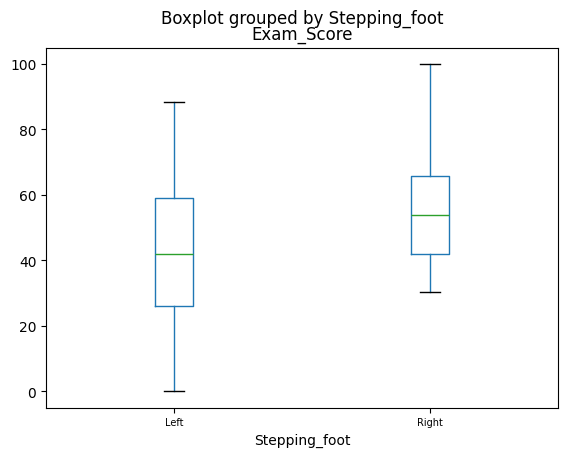

In [61]:
# prompt: # กราฟ Box plot สำหรับ step foot AND exam score
df.boxplot(column='Exam_Score', by='Stepping_foot', grid=False)
plt.xticks(fontsize=7)
plt.show()

##1.2 Data Augmentation


---
จากข้อมูลที่มีอยุ่จะเห็นได้ว่ามีข้อมูลบางส่วนที่ไม่สามารถนำมาวิเคราะห์ทางสถิติได้ ซึ่งเราสามารถเปลี่ยนแปลงโดยใช้ค่าเฉลี่ยได้แต่ว่าเพื่อไม่ให้ข้อมูลเดิมเสียหายเราจึงจะใช้วิธี Data Augmentation เพื่อให้ข้อมูลเดิมไม่เสียหาย


In [62]:
# ทำซ้ำข้อมูลนักเรียนสำหรับการเปลี่ยนแปลงข้อมูล
data = df.copy()
#ตัวอย่างการแปลงข้อมูลของสีปากกาเป็นค่าเฉลี่ยของคะแนนสอบ
display(data.groupby('Pen_color')['Exam_Score'].mean())
data.info()

,Exam_Score
Pen_color,
Black,40.291481
Blue,45.063235
Green,43.323378
Red,41.327500
Yellow,57.528964


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sleep_Hours            500 non-null    float64
 1   Stepping_foot          500 non-null    object 
 2   Worship_location       500 non-null    object 
 3   Is_single              500 non-null    object 
 4   GPAX                   500 non-null    float64
 5   Attendance_percentage  500 non-null    float64
 6   Practice_hours         500 non-null    float64
 7   Pen_color              500 non-null    object 
 8   Food_choice            500 non-null    object 
 9   Exam_Score             500 non-null    float64
dtypes: float64(5), object(5)
memory usage: 39.2+ KB


In [63]:
#เปลี่ยนแปลงข้อมูลเป็นค่าเฉลี่ยของแต่ละข้อมูลที่ต่างกันในแต่ละฟิลด์
for col in ['Stepping_foot', 'Pen_color', 'Worship_location', 'Is_single', 'Food_choice']:
    data[col] = data[col].map(data.groupby(col)['Exam_Score'].mean().to_dict())

display(data)


,Sleep_Hours,Stepping_foot,Worship_location,Is_single,GPAX,Attendance_percentage,Practice_hours,Pen_color,Food_choice,Exam_Score
0,9.0,56.189898,40.870282,45.624688,3.47,46.47,4.30,40.291481,45.801840,43.52
1,7.0,56.189898,57.340952,45.624688,3.00,82.07,1.78,57.528964,45.801840,49.70
2,9.0,43.033102,42.424706,50.936557,2.98,61.45,3.50,43.323378,45.801840,61.72
3,9.0,56.189898,57.340952,45.624688,3.71,83.22,0.56,57.528964,45.801840,47.27
4,6.0,43.033102,57.340952,45.624688,3.46,49.40,2.52,57.528964,50.600000,48.91
...,...,...,...,...,...,...,...,...,...,...
495,7.0,43.033102,42.962963,45.624688,2.60,46.26,1.40,41.327500,45.801840,10.06
496,8.0,43.033102,42.424706,45.624688,3.92,78.51,1.27,45.063235,45.801840,58.28
497,7.0,43.033102,57.340952,50.936557,3.15,82.16,4.21,43.323378,48.994337,67.87
498,8.0,43.033102,57.340952,45.624688,3.85,55.45,5.07,45.063235,48.167500,84.91


In [64]:
#ตรวจสอบข้อมูลหลังจากเปลี่ยนแปลงข้อมูลแล้ว
data.describe()

,Sleep_Hours,Stepping_foot,Worship_location,Is_single,GPAX,Attendance_percentage,Practice_hours,Pen_color,Food_choice,Exam_Score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,7.536000,48.216880,48.216880,48.216880,3.271080,48.18396,2.482040,48.216880,48.216880,48.216880
std,1.503737,6.435307,7.825108,2.657829,0.403671,28.67141,1.986675,7.525375,1.835709,20.502717
min,4.000000,43.033102,40.002429,45.624688,1.990000,0.02000,0.010000,40.291481,45.801840,0.000000
25%,7.000000,43.033102,40.870282,45.624688,2.990000,23.30250,1.100000,41.327500,45.801840,33.377500
50%,8.000000,43.033102,42.962963,45.624688,3.320000,46.66000,1.875000,45.063235,48.994337,47.630000
75%,9.000000,56.189898,57.340952,50.936557,3.600000,73.06500,3.365000,57.528964,49.605000,62.315000
max,11.000000,56.189898,57.340952,50.936557,3.970000,99.58000,10.000000,57.528964,50.600000,100.000000


#2 Data visualization


---

มาดูกันว่าหน้าตาของข้อมูลเป็นอย่างไรด้วยวิธี Data visualization ซึ่งเป็นการนำข้อมูลมานำเสนอเป็นรูปภาพเพื่อให้เข้าใจเกี่ยวกับข้อมูลมากขึ้น

 ![image.png](https://miro.medium.com/v2/resize:fit:932/1*Qz_gwy4ZaSZuOpl3IyO2HA.png)

โดยตารางนี้เป็นค่าความสัมพันธ์ของข้อมูล


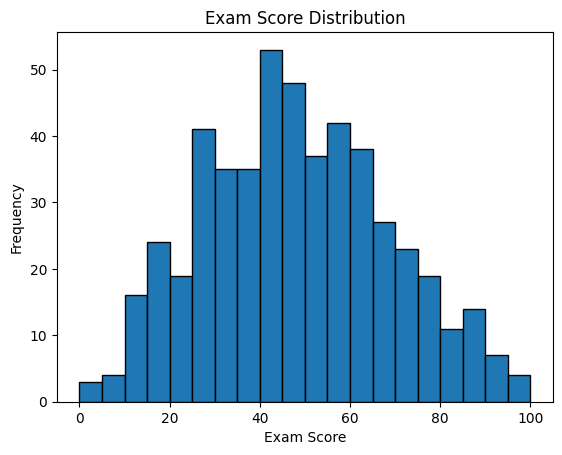

In [65]:
# ดูค่าการกระจายของคะแนนสอบ ทั้งหมด 500 คน

plt.hist(data['Exam_Score'], bins=20, edgecolor='black')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Exam Score Distribution')
plt.show()


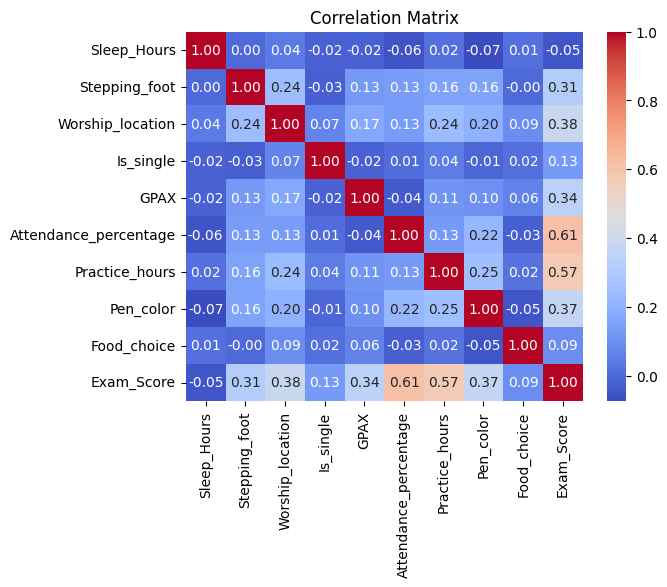

In [66]:
# ดูความสัมพันธ์ของข้อมูลทั้งหมดในทุกฟิลด์
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


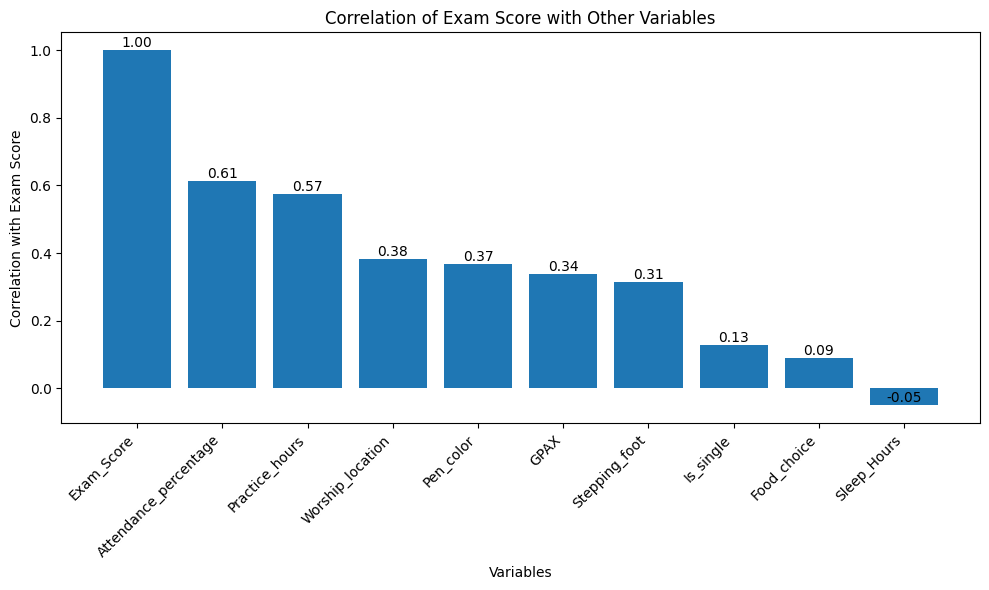

In [67]:

# Calculate the correlation matrix with Exam_Score
correlation_with_exam_score = data.corr()['Exam_Score']

# เรียงลำดับข้อมูลจากค่า correlation มากไปน้อย
correlation_with_exam_score = correlation_with_exam_score.sort_values(ascending=False)

# Plot the correlation matrix
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(correlation_with_exam_score.index, correlation_with_exam_score.values)
plt.xlabel('Variables')
plt.ylabel('Correlation with Exam Score')
plt.title('Correlation of Exam Score with Other Variables')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# สำหรับการบอกค่า correlation ในแต่ละฟิลด์
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

##Exercise 01
ลอง promt ในGemini ด้วยข้อความนี้  **prompt: pie graph กับ ข้อมูล sleep hours พร้อมตาราง เปอร์เซ็น ในแต่ละชั่วโมง**

#3 Prediction

หลังจากที่วิเคราะห์ข้อมูลออกมา ส่วนสุดท้ายของโปรเจกต์ นั้นก็คือการทำการนำข้อมูลของนักเรียนคนนี้ ไปทำการคาดเดาคะแนนสอบของเค้าจากข้อมูลที่มี ด้วยวิธีการทำ model `Linear Regression`


## 3.1 Linear Regression


---


หนึ่งในโมเดลของ `Supervised Learning `ที่ใช้ในการทำนายค่าต่อเนื่อง โดย Linear Regression จะใช้สมการเส้นตรง (linear equation) เพื่อจับ ความสัมพันธ์ระหว่างตัวแปรอิสระ (Features) และตัวแปรตาม (Target)  หลักการของ Linear Regression คือการค้นหาเส้นตรงที่เหมาะสมที่สุดในการแสดงความสัมพันธ์ระหว่างข้อมูล





##3.2 libary for traning data set


---



In [68]:
from sklearn.linear_model import LinearRegression #สำหรับการทำmodel ที่จะพยากรณ์คะแนนสอบ
from sklearn.model_selection import train_test_split #แยกข้อมูลสำหรับการทดสอบประสิทธิภาพของโมเดล
from sklearn.metrics import root_mean_squared_error #คำนวณค่า RMSE สำหรับการทดสอบประสิทธิภาพ

## 3.3 Model Testing and Evaluation


---




## Exercise 2


---


ทำการเทรนโมเดล linear regression ระหว่าง exam_score กับ GPAX แสดงเป็นกราฟ และ สังเกตุ ค่าที่เกี่ยวข้อง (ความชัน , จุดตัดแกนy)
และ เทรนโมเดลกับข้อมูลที่ผ่านการทำ   [Data Augmentation](#scrollTo=O6oiq3A_uYu2) ในหัวข้อที่ 1.2



---



Root Mean Squared Error (RMSE): 14.66897914119492
Intercept: 27.398179630765018
Coefficient: 0.4319627022145308


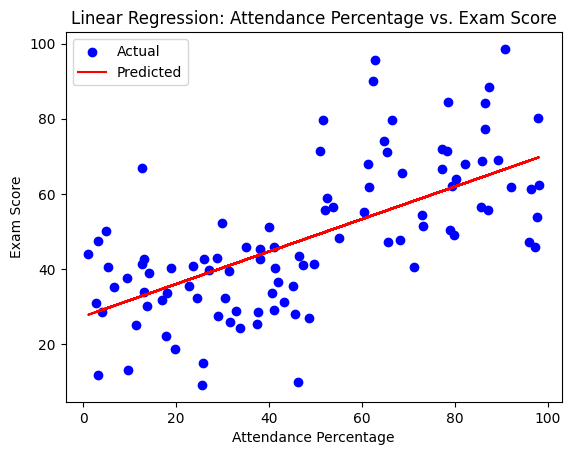

In [69]:
# ทำ linear regression ระหว่าง final_score กับ Attendance_percentage

# Prepare the data
X = data[['Attendance_percentage']]
y = data['Exam_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Attendance Percentage')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Attendance Percentage vs. Exam Score')
plt.legend()
plt.show()

## 3.3 Predict


---


มาลองทำนายผลคะแนน ด้วยข้อมูลของตัวเองกันโดยใช้ข้อมูลชั่วโมงในการทำโจทย์โดยเฉลี่ย 1วัน


Intercept: 33.12439738867794
Coefficient: 6.098261063479195
Root Mean Squared Error: 46.83470081750951


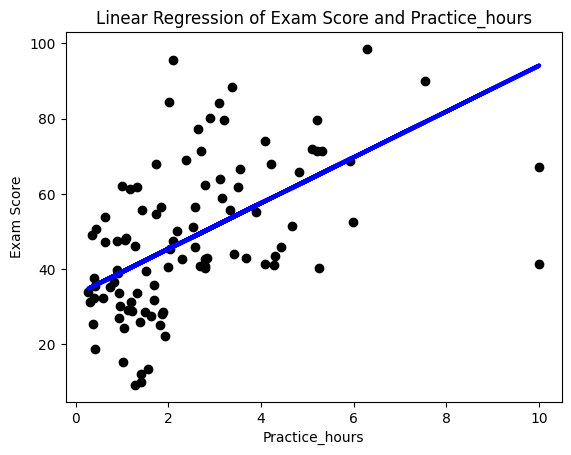

In [85]:

X = data[['Practice_hours']]
y = data['Exam_Score']

X_train, X_test_PH, y_train, y_test_PH = train_test_split(X, y, test_size=0.2, random_state=42)

model_Practice_hours = LinearRegression()
model_Practice_hours.fit(X_train, y_train)
# Print model coefficients
print(f"Intercept: {model_Practice_hours.intercept_}")
print(f"Coefficient: {model_Practice_hours.coef_[0]}")
y_pred_PH = model_Practice_hours.predict(X_test_PH)

print('Root Mean Squared Error:', root_mean_squared_error(X_test_PH, y_pred_PH))
# plot the linear regression
plt.scatter(X_test_PH, y_test_PH, color='black')
plt.plot(X_test_PH, y_pred_PH, color='blue', linewidth=3)
plt.xlabel('Practice_hours')
plt.ylabel('Exam Score')
plt.title('Linear Regression of Exam Score and Practice_hours')
plt.show()




In [81]:
#predict Examscore from Practice_hours
info = float(input("Enter your Practice hours hear: "))
if 0 <= info <= 10:
  result = model_Practice_hours.predict([[info]])
  print(f"Your Exam score is {result[0]}")
else:
  print("Your Practice hours is not in range")

Enter your Practice hours hear: 1
Your Exam score is 39.222658452157134


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 4 Conclusion


---
!["hi"](https://drive.google.com/uc?id=1WP54o9H4CUzN0wEEOhR0uq6O0KIAW3q1)


จากที่น้อง ๆ ได้เรียนรู้ และลงมือทำใน workshop นี้จะเห็นได้ว่าข้อมูลที่นักเรียนสายมูคนนี้เก็บมาเพื่อที่จะทำนายผลคะแนนของตัวเองนั้น มีทั้งข้อมูลที่เป็นวิทยาศาสตร์ และข้อมูลที่เป็นโหราศาสตร์ ซึ่งข้อมูลทั้งสองแบบมีทั้งส่งผลต่อคะแนนสอบ และไม่ส่งผลกับคะแนนเลย ส่วนของข้อมูลวิทยาศาสตร์จะเห็นว่า
*   `Attendance_percentage`  จะมีความสัมพันธ์กับคะแนนสอบมาก
*   `Sleep_Hours`  จะมีความสัมพันธ์กับคะแนนน้อย

ส่วนของข้อมูลโหราศาสตร์จะเห็นว่า
*  `Pen_color` จะมีความสัมพันธ์กับคะแนนมาก โดย**ปากกาสีเหลือง**ช่วยให้ได้คะแนนดีที่สุด
*  `Food_choice` จะมีความสัมพันธ์กับคะแนนน้อย


ซึ่งการที่นักเรียนคนนี้จะนำข้อมูลเหล่านี้มาใช้ทำ linear regression นั้นจะต้องใช้ เทคนิคการทำ data visualization และการวิเคราะห์ความสัมพันธ์ของข้อมูลต่าง ๆ เพื่อให้ผลคะแนนสอบที่นักเรียนคนนี้พึงพอใจ

#Extra


---


multiple variable

X shape: (500, 9)
First five elements of x are:
    Sleep_Hours  Stepping_foot  Worship_location  Is_single  GPAX  \
0          9.0      56.189898         40.870282  45.624688  3.47   
1          7.0      56.189898         57.340952  45.624688  3.00   
2          9.0      43.033102         42.424706  50.936557  2.98   
3          9.0      56.189898         57.340952  45.624688  3.71   
4          6.0      43.033102         57.340952  45.624688  3.46   

   Attendance_percentage  Practice_hours  Pen_color  Food_choice  
0                  46.47            4.30  40.291481     45.80184  
1                  82.07            1.78  57.528964     45.80184  
2                  61.45            3.50  43.323378     45.80184  
3                  83.22            0.56  57.528964     45.80184  
4                  49.40            2.52  57.528964     50.60000  
y shape: (500,)
First five elements of y are:
 0    43.52
1    49.70
2    61.72
3    47.27
4    48.91
Name: Exam_Score, dtype: float64
Root 

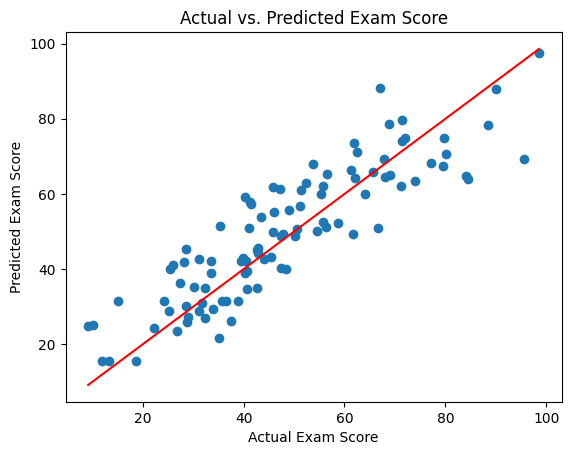

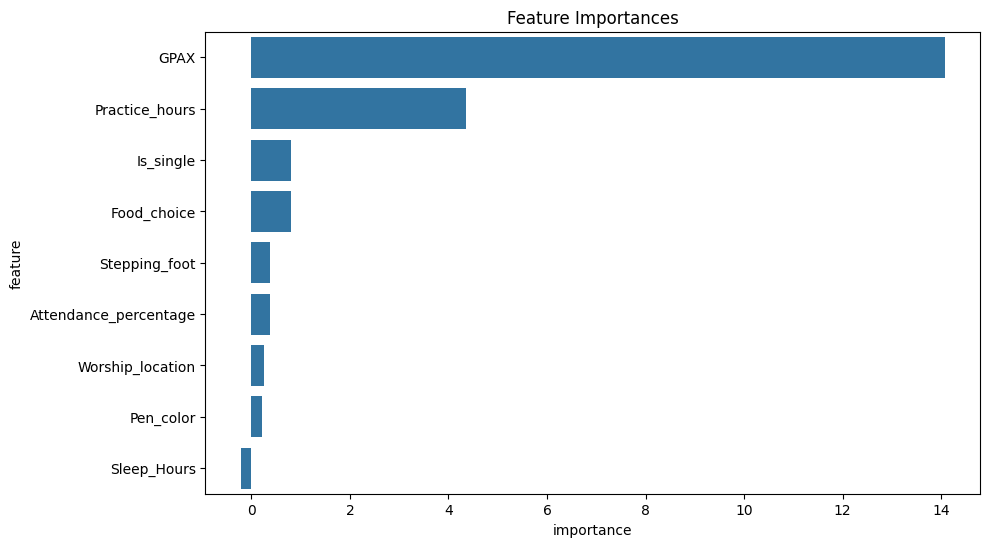

In [73]:
# linear regression to predict Exam_Score in data with maltiple parametor to make it the most efficiancy

# Use all features for prediction
X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']

print(f"X shape: {X.shape}")
print("First five elements of x are:\n", X[:5])
print(f"y shape: {y.shape}")
print("First five elements of y are:\n", y[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')

# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs. Predicted Exam Score")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Add a diagonal line for reference
plt.show()


#Feature Importance
importances = pd.DataFrame({'feature': X.columns, 'importance': model.coef_})
importances = importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importances')
plt.show()

In [74]:
display(df.groupby('Is_single')['Exam_Score'].mean())
Is_single_dict = {}
Is_single_dict['No'] = 45.624688
Is_single_dict['Yes'] = 50.936557

display(df.groupby('Food_choice')['Exam_Score'].mean())
Food_choice_dict = {}
Food_choice_dict['Banana'] = 48.994337
Food_choice_dict['Egg'] = 48.167500
Food_choice_dict['Grass Jelly'] = 49.605000
Food_choice_dict['Pork'] = 45.801840
Food_choice_dict['Truffle'] = 50.600000

display(df.groupby('Stepping_foot')['Exam_Score'].mean())
Stepping_foot_dict = {}
Stepping_foot_dict['Left'] = 43.033102
Stepping_foot_dict['Right'] = 56.189898

display(df.groupby('Worship_location')['Exam_Score'].mean())
Worship_location_dict = {}
Worship_location_dict['Bangkok City Pillar Shrine'] = 42.424706
Worship_location_dict['Erawan Shrine'] = 42.962963
Worship_location_dict['Ganesha temple'] = 40.002429
Worship_location_dict['No specific location'] = 40.870282
Worship_location_dict['Two Kings Monuments'] = 57.340952

display(df.groupby('Pen_color')['Exam_Score'].mean())
Pen_score_dict = {}
Pen_score_dict['Black'] = 40.291481
Pen_score_dict['Blue'] = 45.063235
Pen_score_dict['Green'] = 43.323378
Pen_score_dict['Red'] = 41.327500
Pen_score_dict['Yellow'] = 57.528964

,Exam_Score
Is_single,
No,45.624688
Yes,50.936557


,Exam_Score
Food_choice,
Banana,48.994337
Egg,48.167500
Grass Jelly,49.605000
Pork,45.801840
Truffle,50.600000


,Exam_Score
Stepping_foot,
Left,43.033102
Right,56.189898


,Exam_Score
Worship_location,
Bangkok City Pillar Shrine,42.424706
Erawan Shrine,42.962963
Ganesha temple,40.002429
No specific location,40.870282
Two Kings Monuments,57.340952


,Exam_Score
Pen_color,
Black,40.291481
Blue,45.063235
Green,43.323378
Red,41.327500
Yellow,57.528964


In [76]:
#@title simple form fields
sleep_hour = 5 # @param {"type":"number"}
stepping_foot = 'Right' # @param ["Left", "Right"]
worship_location = 'Two Kings Monuments' # @param ["Bangkok City Pillar Shrine", "Erawan Shrine", "Ganesha temple", "No specific location", "Two Kings Monuments"]
is_single = 'No' # @param ["No", "Yes"]
Gpax = 3.4 # @param {"type":"number"}
attendance_percent = 80 # @param {"type":"number"}
prac_hour = 10 # @param {"type":"number"}
pen_color = 'Green' # @param ["Black", "Blue", "Green", "Red", "Yellow"]
food = 'Grass Jelly' # @param ["Banana", "Egg", "Grass Jelly", "Pork", "Truffle"]
sleep_hour = float(sleep_hour)
Gpax = float(Gpax)
attendance_percent = float(attendance_percent)
prac_hour = float(prac_hour)

check_error = False
if sleep_hour < 0 or sleep_hour > 12:
  print("Your sleep hours is not in range (0-12)")
  check_error = True
if Gpax < 0 or Gpax > 4:
  print("Your Gpax is not in range (0.0-4.0)")
  check_error = True
if attendance_percent < 0 or attendance_percent > 100:
  print("Your attendance percent is not in range (0-100)")
  check_error = True
if prac_hour < 0 or prac_hour > 12:
  print("Your practice hours is not in range (0-12)")
  check_error = True


if check_error:
  print("กรุณาใส่ข้อมูลใหม่")
else:
  result = model.predict([[sleep_hour
                          ,Stepping_foot_dict[stepping_foot]
                          ,Worship_location_dict[worship_location]
                          ,Is_single_dict[is_single]
                          ,Gpax
                          ,attendance_percent
                          ,prac_hour
                          ,Pen_score_dict[pen_color]
                          ,Food_choice_dict[food]]])
  print(f"คาดการณ์ผลคะแแนนสอบของคุณ : {result[0]}")

คาดการณ์ผลคะแแนนสอบของคุณ : 98.76477811866471


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
